In [1]:
import numpy as np
from numpy.random import default_rng
from typing import Tuple
import matplotlib.pyplot as plt
from MY_RANSAC import ransac,data,line

from scipy.linalg import lstsq


rng = default_rng()

In [2]:
p_gen = data.Point_Generator(100,0.55)
X,y = p_gen.generate_case(eps=0.55)

In [3]:
poly_degree = 1

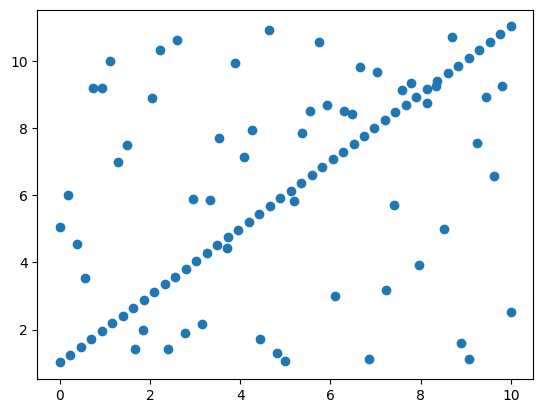

In [4]:
plt.scatter(X,y)

In [5]:
Line = line.Line(x=X,y=y,degree=poly_degree)
Line.estimate_params()
inliers_x, inliers_y, outliers_x, outliers_y = Line.devide_points(X, y, eps = 0.1)
_poly1d = Line.get_poly1d() 

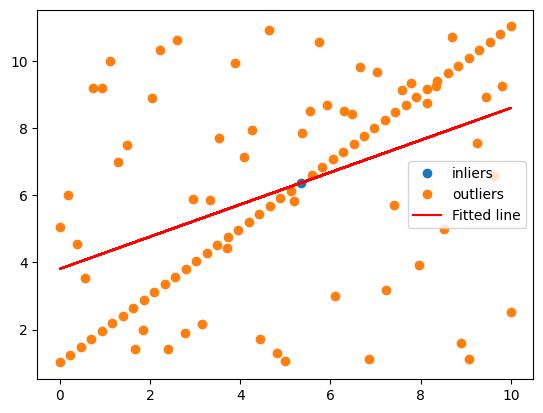

In [6]:
plt.plot(inliers_x, inliers_y, 'o', label='inliers')
plt.plot(outliers_x, outliers_y, 'o', label='outliers')
y_out = _poly1d(X)
plt.plot(X, y_out, 'r', label='Fitted line')
plt.legend()
plt.show()

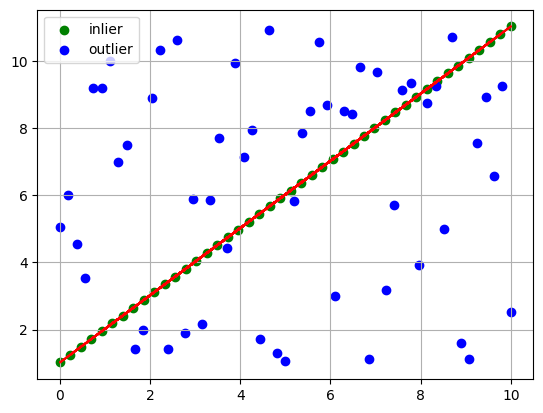

In [7]:
Ransac =  ransac.RANSAC()
case_params = {'x': X, 'y': y,"poly_degree":poly_degree}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()

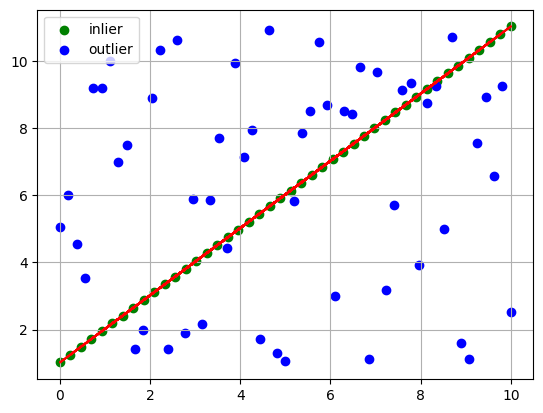

In [8]:
Ransac =  ransac.RANSAC()
case_params ={'x': X, 'y': y,"poly_degree":poly_degree, 'n_pointsy': 5}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()